## 作業1
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import numpy as np

In [5]:
import pandas as pd

In [2]:
np.random.randint(10,size=10)

array([9, 8, 1, 7, 0, 7, 5, 6, 4, 2])

In [3]:
nations = ["Taiwan","China","The USA","England","Japan"]
populations = np.random.randint(100000000,size=5)

list_labels = ["nation","population"]
list_col = [nations,populations]

number = list(zip(list_labels,list_col))

In [6]:
nation_pop = pd.DataFrame(dict(number))
print(nation_pop)

    nation  population
0   Taiwan     1252535
1    China    85755878
2  The USA    18541457
3  England     7872617
4    Japan    12485752


In [7]:
nation_pop.groupby(by="nation")['population'].mean()

nation
China      85755878
England     7872617
Japan      12485752
Taiwan      1252535
The USA    18541457
Name: population, dtype: int32

# 作業2

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [1]:
import requests
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [2]:
data = data.split("\n")
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [3]:
import pandas as pd

arrange_data = []
for d in data:
    line = d.split("\t")
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [9]:
df_lazy = pd.read_csv(target_url,sep="\t", header=None)

In [10]:
df_lazy.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


(435, 499, 3)


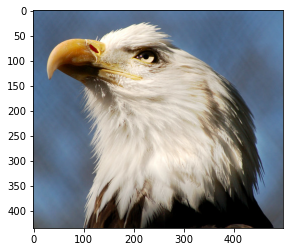

In [11]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get(df.loc[0, 1]) # 先讀取第一筆資料的圖片
img = Image.open(BytesIO(response.content))
img = np.array(img)
print(img.shape)
plt.imshow(img)
plt.show()

In [28]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256)) # 假如 resize, 就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass
    
    return img_list

In [40]:
result=5  
seq=result
while len(img2arr_fromURLs(df[0:seq][1].values))<result:
    seq+=1
print("Total images that we search: %i " % seq) 



Total images that we search: 10 


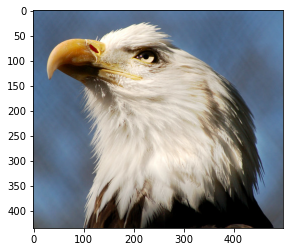

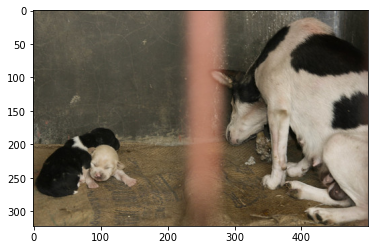

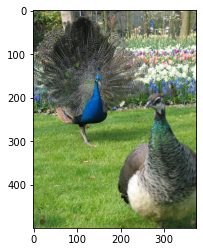

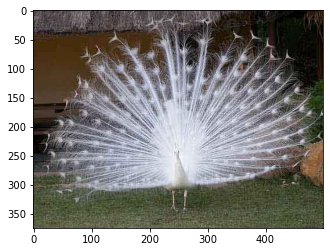

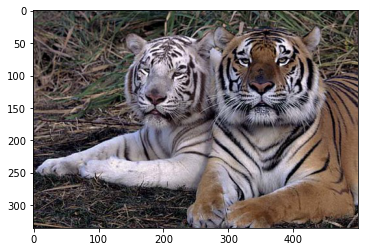

In [41]:
figure=img2arr_fromURLs(df[0:seq][1])
for im_get in figure:
    plt.imshow(im_get)
    plt.show()